<a href="https://colab.research.google.com/github/ShubhamShaw01/StockMarketPrediction/blob/main/StockMarketPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project we are going to explore the idea of stock market prediction with using ml model like lstm (long-short term memory) Model .

In [ ]:
 #pip install numpy
# !pip install pandas
# !pip install matplotlib
#!pip install --upgrade yfinance
# !pip install datetime
#!pip install --upgrade tensorflow
# !pip install sklearn
# !pip install keras

**Importing essential Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta

**acquiring data**

In [ ]:
end = datetime.today().strftime('%Y-%m-%d')
stock = 'TCS.NS' #input("Enter the company stock code/name :")
data = yf.download(stock,end=end)

[*********************100%***********************]  1 of 1 completed


***Data***

In [ ]:
data.reset_index(inplace=True)
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2002-08-12,28.453562,28.668576,27.754764,27.754764,212976
1,2002-08-13,28.068327,28.946304,27.862273,28.489398,153576
2,2002-08-14,26.133200,28.131040,25.604621,28.131040,822776
3,2002-08-15,26.133200,26.133200,26.133200,26.133200,0
4,2002-08-16,26.070486,27.235147,25.622540,25.998816,811856
...,...,...,...,...,...,...
5663,2025-06-06,3384.199951,3390.899902,3358.699951,3371.100098,2070390
5664,2025-06-09,3421.899902,3434.000000,3390.899902,3400.000000,1718678
5665,2025-06-10,3462.899902,3485.800049,3423.199951,3440.000000,2419874


In [ ]:
total_missing_values = data.isnull().sum().sum()
print(f"Total missing values in the dataset: {total_missing_values}")

Total missing values in the dataset: 0


In [ ]:
from sklearn.impute import KNNImputer

# Select only numerical features for imputation
numerical_features = data.select_dtypes(include=np.number).columns
data_numerical = data[numerical_features]

# Suppose 'data' is your DataFrame and you wish to impute missing values
imputer = KNNImputer(n_neighbors=5, weights="uniform")
data_imputed_numerical = pd.DataFrame(imputer.fit_transform(data_numerical), columns=data_numerical.columns, index=data_numerical.index) # keep the original index

# Concatenate the imputed numerical features with the original 'Date' column
# Instead of overwriting 'data', create a new DataFrame or update existing columns.
# Here, I am updating the existing data DataFrame with the imputed values.
data.update(data_imputed_numerical) # keep original data, update it with the imputed values

print("Data after imputation:")
data

Data after imputation:


Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2002-08-12,28.453562,28.668576,27.754764,27.754764,212976
1,2002-08-13,28.068327,28.946304,27.862273,28.489398,153576
2,2002-08-14,26.133200,28.131040,25.604621,28.131040,822776
3,2002-08-15,26.133200,26.133200,26.133200,26.133200,0
4,2002-08-16,26.070486,27.235147,25.622540,25.998816,811856
...,...,...,...,...,...,...
5663,2025-06-06,3384.199951,3390.899902,3358.699951,3371.100098,2070390
5664,2025-06-09,3421.899902,3434.000000,3390.899902,3400.000000,1718678
5665,2025-06-10,3462.899902,3485.800049,3423.199951,3440.000000,2419874


**Graph**

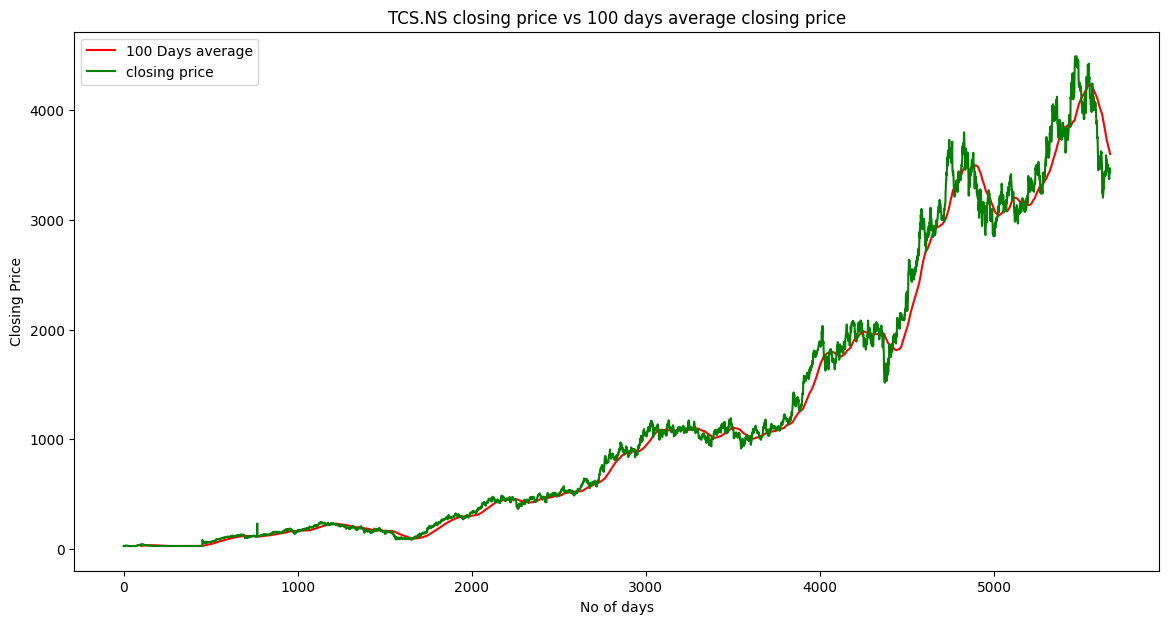

In [ ]:
ma_100_days = data['Close'].rolling(100).mean()
plt.figure(figsize=(14,7))
plt.plot(ma_100_days,'r',label="100 Days average")
plt.plot(data.Close,'g',label="closing price")
plt.legend()
plt.xlabel("No of days")
plt.ylabel("Closing Price")
plt.title(f"{stock} closing price vs 100 days average closing price")
plt.show()

***checking with different no of dates***

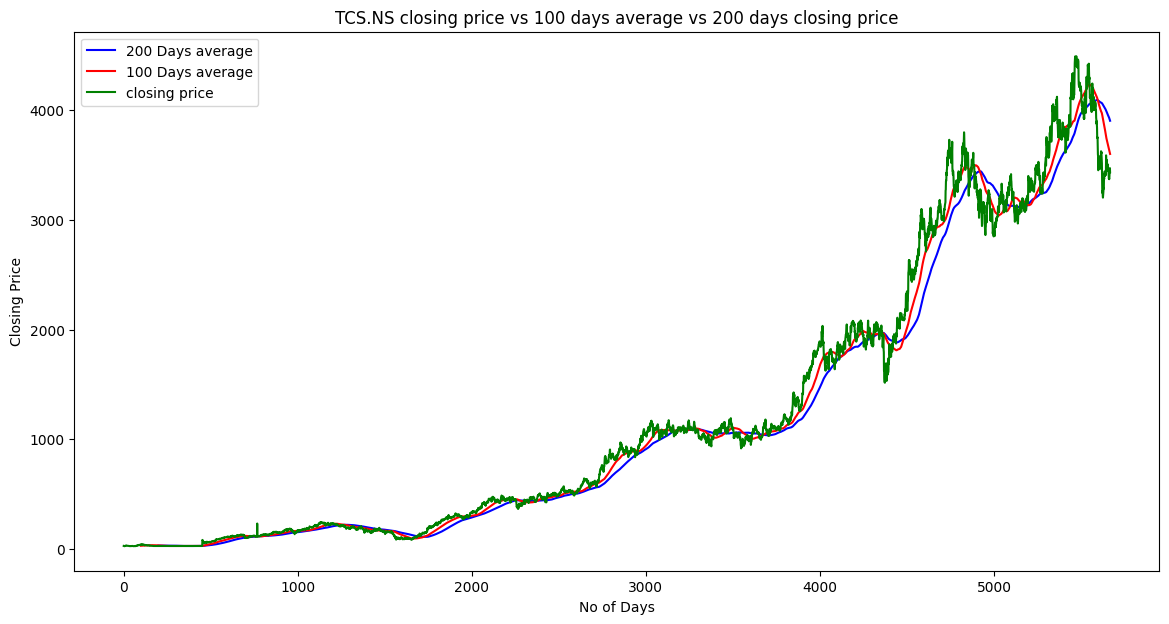

In [ ]:
ma_200_days=data.Close.rolling(200).mean()
plt.figure(figsize=(14,7))
plt.plot(ma_200_days,'b',label="200 Days average")
plt.plot(ma_100_days,'r',label="100 Days average")
plt.plot(data.Close,'g',label='closing price')
plt.legend()
plt.xlabel('No of Days')
plt.ylabel('Closing Price')
plt.title(f'{stock} closing price vs 100 days average vs 200 days closing price')
plt.show()

In [ ]:
data.dropna(inplace=True)
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):int(len(data))])

In [ ]:
data_train.shape[0]

4534

In [ ]:
data_test.shape[0]

1134

importing sklearn

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_train_array=scaler.fit_transform(data_train)
x=[]
y=[]
for i in range(100,data_train_array.shape[0]):
  x.append(data_train_array[i-100:i])
  y.append(data_train_array[i,0])
x,y=np.array(x),np.array(y)

importing sequential lstm model,dense and dropout from keras

In [ ]:
# from tensorflow.keras.layers import Dense,Dropout,LSTM
# from tensorflow.keras.models import Sequential

In [ ]:
# model=Sequential()
# model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x.shape[1],1)))
# model.add(Dropout(0.1))
# model.add(LSTM(units=100,activation='relu'))
# model.add(Dropout(0.2))

# model.add(Dense(units=1))

In [ ]:
# model.compile(optimizer='adam',loss='mean_squared_error')
# model.fit(x,y,epochs=50,shuffle=False, batch_size=32,verbose =1)

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM, LayerNormalization, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Assuming x and y are defined earlier in your code
# For example:
# x = ...  # Your input data with shape (samples, timesteps, features)
# y = ...  # Your target data

# Define the model
model = Sequential()
model.add(Bidirectional(LSTM(units=128, activation='tanh', recurrent_activation='sigmoid', return_sequences=True, input_shape=(x.shape[1], x.shape[2]))))
#model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=64, activation='tanh', recurrent_activation='sigmoid')))
#model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define callbacks
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')
early_stop = EarlyStopping(monitor='val_loss', patience=10, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)

# Train the model
model.fit(x, y, epochs=100, batch_size=32, validation_split=0.1,
          callbacks=[checkpoint, early_stop, reduce_lr], shuffle=False, verbose=1)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 3.5389e-04 - val_loss: 0.0156 - learning_rate: 0.0010
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0071 - val_loss: 0.0299 - learning_rate: 0.0010
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0304 - val_loss: 0.0194 - learning_rate: 0.0010
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0122 - val_loss: 0.0445 - learning_rate: 0.0010
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0427 - val_loss: 0.0359 - learning_rate: 0.0010
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0304 - val_loss: 0.0460 - learning_rate: 0.0010
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0343 - val_loss: 0.0239 - learning_rate: 0.0010
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0226 - val_loss: 0.0041 - learning_rate: 0.0010
Epoch 9/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0287 - val_loss: 0.0066 - learning_rate: 0.0010


In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_10                │ (None, 100, 256)       │       133,120 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_11                │ (None, 128)            │       164,352 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 904,901 (3.45 MB)

 Trainable params: 301,633 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 603,268 (2.30 MB)

In [ ]:
pas_100_days=data_train.tail(100)
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)
data_test_array=scaler.fit_transform(data_test)
x=[]
y=[]
for i in range(100,data_test.shape[0]):
  x.append(data_train_array[i-100:i])
  y.append(data_train_array[i,0])
x,y=np.array(x),np.array(y)
y_predict=model.predict(x)
scale=1/scaler.scale_
y_predict=y_predict*scale
y=y*scale

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


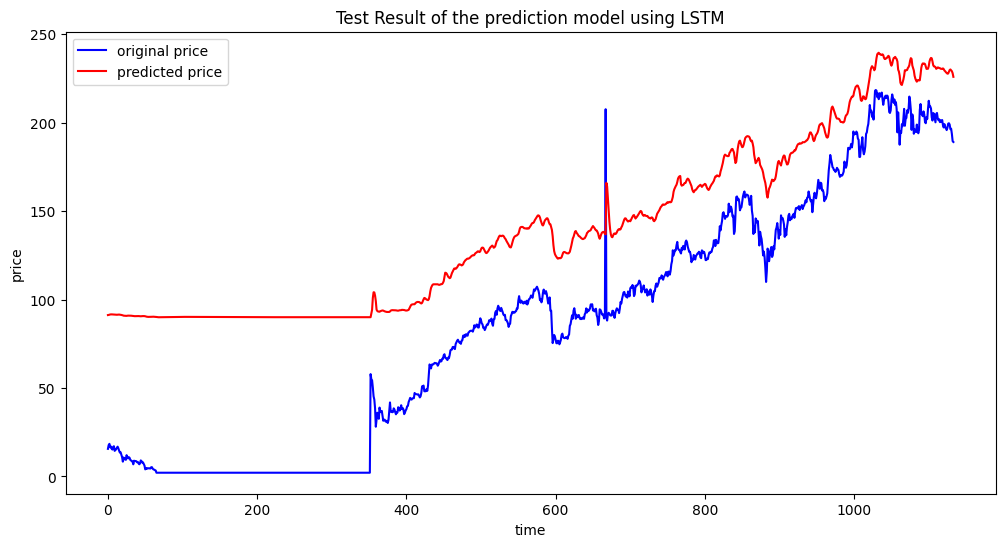

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y,'b',label='original price')
plt.plot(y_predict,'r',label='predicted price')
plt.xlabel('time')
plt.ylabel('price')
plt.title("Test Result of the prediction model using LSTM")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Scale the test set data (30% of total data)
inputs = scaler.transform(data_test.values.reshape(-1, 1))

# Create sequences for predictions based on the test data
X_test = [inputs[i-100:i, 0] for i in range(100, len(inputs))]
X_test = np.array(X_test).reshape(-1, 100, 1)

# Model prediction for test data
predicted_test_price = model.predict(X_test)
predicted_test_price = scaler.inverse_transform(predicted_test_price)

# Calculate MAPE between actual and predicted prices
mape = mean_absolute_percentage_error(data_test.values[100:], predicted_test_price)

# Display accuracy
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Mean Absolute Percentage Error (MAPE): 3.48%


(array([20120., 20148., 20179., 20209., 20240., 20270., 20301.]),
 [Text(20120.0, 0, '2025-02'),
  Text(20148.0, 0, '2025-03'),
  Text(20179.0, 0, '2025-04'),
  Text(20209.0, 0, '2025-05'),
  Text(20240.0, 0, '2025-06'),
  Text(20270.0, 0, '2025-07'),
  Text(20301.0, 0, '2025-08')])

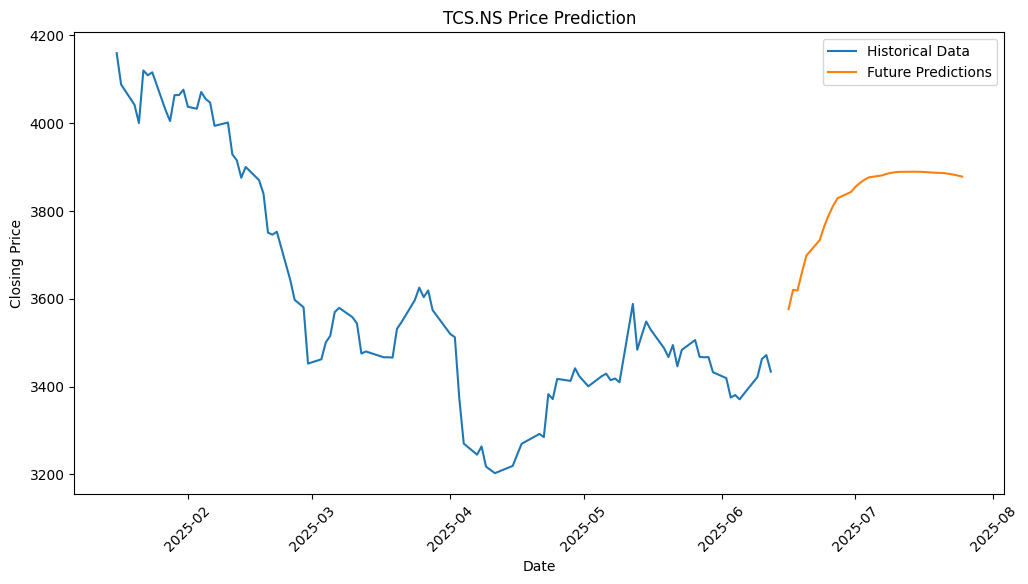

In [ ]:
inputs = data_test_array[-100:].flatten()
future_preds_scaled = []
for _ in range(30):
    x_input = inputs[-100:].reshape(1, 100, 1)
    pred_scaled = model.predict(x_input, verbose=0)[0, 0]
    future_preds_scaled.append(pred_scaled)
    inputs = np.append(inputs, pred_scaled)

# Optional: Apply a moving average smoothing to reduce prediction noise
def smooth_predictions(preds, window=3):
    if len(preds) < window:
        return preds
    smoothed = np.convolve(preds, np.ones(window) / window, mode='valid')
    # Prepend the unsmoothed values to maintain the length
    pad_width = len(preds) - len(smoothed)
    return np.concatenate((preds[:pad_width], smoothed))

# Adjust the smoothing window size as needed
future_preds_scaled = smooth_predictions(future_preds_scaled, window=3)

# Inverse transform to original price scale
future_prices = scaler.inverse_transform(
    np.array(future_preds_scaled).reshape(-1, 1)
).flatten()

# Generate next 30 business days
future_dates = []
current_date = datetime.today()
days_added = 0
while days_added < 30:
    current_date += timedelta(days=1)
    if current_date.weekday() < 5:  # Mon-Fri
        future_dates.append(current_date.date())
        days_added += 1

# Create predictions DataFrame
pred_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Price': future_prices
})

# Note: The following lines involving 'st' indicate this code is intended for a Streamlit app.
# If you are not running this in a Streamlit app, you will need to remove or adapt these lines.
# Also ensure 'st' is imported if you are using Streamlit.
# import streamlit as st # You might need to uncomment and install streamlit

# if 'st' in globals(): # Check if streamlit is available
#     st.write(pred_df.set_index('Date'))

# Prepare historical data with Date as a column
df_hist = data.reset_index().iloc[-100:]
# Use the future dates and predictions (future_prices) generated earlier
plt.figure(figsize=(12, 6))
plt.plot(df_hist['Date'], df_hist['Close'], label='Historical Data')
plt.plot(pred_df['Date'], pred_df['Predicted_Price'], label='Future Predictions')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title(f"{stock} Price Prediction")
plt.legend()
plt.xticks(rotation=45)

# if 'st' in globals(): # Check if streamlit is available
#     st.pyplot(plt.gcf())
#     plt.clf()
# else: # If not in streamlit, just show the plot
#     plt.show()

In [ ]:
# prompt: print the value of all the 30 days

print("Predicted values for the next 30 days:")
for i, (date, price) in enumerate(zip(future_dates, future_prices)):
  print(f"Day {i+1} ({date}): {price:.2f}")

Predicted values for the next 30 days:
Day 1 (2025-06-16): 3576.41
Day 2 (2025-06-17): 3620.21
Day 3 (2025-06-18): 3619.07
Day 4 (2025-06-19): 3660.06
Day 5 (2025-06-20): 3698.50
Day 6 (2025-06-23): 3733.71
Day 7 (2025-06-24): 3764.58
Day 8 (2025-06-25): 3790.30
Day 9 (2025-06-26): 3811.53
Day 10 (2025-06-27): 3828.94
Day 11 (2025-06-30): 3843.20
Day 12 (2025-07-01): 3854.66
Day 13 (2025-07-02): 3863.61
Day 14 (2025-07-03): 3870.72
Day 15 (2025-07-04): 3876.45
Day 16 (2025-07-07): 3881.00
Day 17 (2025-07-08): 3884.43
Day 18 (2025-07-09): 3886.75
Day 19 (2025-07-10): 3888.30
Day 20 (2025-07-11): 3889.06
Day 21 (2025-07-14): 3889.38
Day 22 (2025-07-15): 3889.25
Day 23 (2025-07-16): 3889.05
Day 24 (2025-07-17): 3888.50
Day 25 (2025-07-18): 3887.61
Day 26 (2025-07-21): 3886.19
Day 27 (2025-07-22): 3884.64
Day 28 (2025-07-23): 3882.91
Day 29 (2025-07-24): 3880.79
Day 30 (2025-07-25): 3878.26


In [ ]:
transactions = []
n = len(pred_df)
i = 0
while i < n - 1:
    # Find buy point (local minima)
    while i < n - 1 and pred_df['Predicted_Price'].iloc[i+1] <= pred_df['Predicted_Price'].iloc[i]:
        i += 1
    buy_idx = i
    # Find sell point (local maxima)
    j = i + 1
    while j < n and pred_df['Predicted_Price'].iloc[j] >= pred_df['Predicted_Price'].iloc[j-1]:
        j += 1
    sell_idx = j - 1
    # Record profitable trade
    if sell_idx > buy_idx:
        transactions.append({
            'buy_date': pred_df.at[buy_idx, 'Date'],
            'buy_price': pred_df.at[buy_idx, 'Predicted_Price'],
            'sell_date': pred_df.at[sell_idx, 'Date'],
            'sell_price': pred_df.at[sell_idx, 'Predicted_Price']
        })
    i = j

# Simulate compounding trades

# Trading recommendations (Optimized for multiple transactions)
# Note: The following lines involve 'st', indicating this code is intended for a Streamlit app.
# If you are not running this in a Streamlit app, you will need to remove or adapt these lines.
# Also ensure 'st' is imported if you are using Streamlit.
# import streamlit as st # You might need to uncomment and install streamlit

# if 'st' in globals(): # Check if streamlit is available
#     st.subheader("Optimal Trading Strategy")

# Ensure the predictions DataFrame is sorted by Date
pred_df = pred_df.sort_values(by="Date").reset_index(drop=True)
transactions = []
n = len(pred_df)
# if 'st' in globals(): # Check if streamlit is available
#     if n < 2:
#       st.warning("Insufficient predicted data for a reliable trading strategy.")
#     else:
i = 0
# Iterate over the predicted days to identify multiple buy-sell opportunities
while i < n - 1:
  # Find the local minimum (buy point)
  while i < n - 1 and pred_df['Predicted_Price'].iloc[i + 1] <= pred_df['Predicted_Price'].iloc[i]:
    i += 1
  if i == n - 1:
    break
  buy_date = pred_df['Date'].iloc[i]
  buy_price = pred_df['Predicted_Price'].iloc[i]

  # Find the local maximum (sell point)
  j = i + 1
  while j < n and pred_df['Predicted_Price'].iloc[j] >= pred_df['Predicted_Price'].iloc[j - 1]:
    j += 1
  sell_date = pred_df['Date'].iloc[j - 1]
  sell_price = pred_df['Predicted_Price'].iloc[j - 1]

  if sell_price > buy_price:
    transactions.append({
      'buy_date': buy_date,
      'buy_price': buy_price,
      'sell_date': sell_date,
      'sell_price': sell_price
    })
  # Continue from where we left off
  i = j

# Get user investment amount - Streamlit specific code
# if 'st' in globals(): # Check if streamlit is available
#     investment = st.number_input("Enter Investment Amount (₹)",
#                              min_value=1000,
#                              max_value=10000000,
#                              value=1000,
#                              step=1000)

#     if st.button("Calculate Profit", key="calculate_profit"):
#         current_capital = investment
#         transaction_history = []

#         for trade in transactions:
#             # Calculate the number of shares bought at the buy price
#             shares = current_capital / trade['buy_price']
#             # Calculate profit from this trade and update the capital for compounding transactions
#             profit = shares * (trade['sell_price'] - trade['buy_price'])
#             current_capital = shares * trade['sell_price']

#             transaction_history.append({
#                 'Buy Date': trade['buy_date'].strftime('%Y-%m-%d'),
#                 'Buy Price': f"₹{trade['buy_price']:.2f}",
#                 'Sell Date': trade['sell_date'].strftime('%Y-%m-%d'),
#                 'Sell Price': f"₹{trade['sell_price']:.2f}",
#                 'Shares': shares,
#                 'Profit': profit,
#                 'Total Value': current_capital
#             })

#         # Display results
#         if transaction_history:
#             total_profit = current_capital - investment
#             roi = (total_profit / investment) * 100

#             st.subheader("Recommended Trading Plan")
#             st.dataframe(pd.DataFrame(transaction_history))

#             st.subheader("Final Results")
#             col1, col2, col3 = st.columns(3)
#             with col1:
#                 st.metric("Initial Investment", f"₹{investment:,.2f}")
#             with col2:
#                 st.metric("Final Value", f"₹{current_capital:,.2f}")
#             with col3:
#                 st.metric("Total Profit", f"₹{total_profit:,.2f} ({roi:.1f}%)")
#             # save history to database - Note: insert_history function is not defined in the provided code
#             # insert_history(st.session_state.username, company_name, st.session_state.resolved_ticker, investment, current_capital, total_profit)
#         else:
#             st.warning("No profitable trading opportunities found in the prediction window")
#             st.metric("Recommended Action", "Hold Cash", delta_color="off")

Exporting

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('best_model.keras')

In [ ]:
#pip list